# Enunciado

<img src="images/enunciado.png" style="width: 850px;"/>

# Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from EDOnum import *
from utils import *

plt.style.use(['science','no-latex'])

# Definições

In [45]:
# constants
t0 = 0
y0 = np.array([1,0])
tf = 2*np.pi
T = 10
h = 0.1
n = int((tf-t0)/h)

# EDO
def y_dot(t:float,y:np.array) -> np.array:
    return np.array([-np.sin(t),(4*y[0]**2) - 2])

# True Solution
def y_true(t:float) -> np.array:
    return np.array([np.cos(t),np.sin(2*t)])


# Soluções

In [46]:
# EDO
edo_tarefa2 = EDONumSol(y_dot = y_dot,
                        y_0 = y0,
                        t_0 = t0,
                        t_f = tf,
                        h = h)

# Exact Solution
t_e = np.linspace(t0,tf,100)
y_exact = np.array([y_true(t_) for t_ in t_e]).swapaxes(0,1)

## Método de Euler

In [47]:
hs = [0.1, 0.01, 0.001]

sol_euler = []
t = []
for h_ in hs:
    t_,sol = edo_tarefa2.solve(h=h_,method = "euler-explicit")
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_euler.append(sol)

In [48]:
def plot_solution(sol,y_exact,title):
    fig,ax = plt.subplots(figsize=(10,8))

    ax.plot(sol[0][0],sol[0][1],'k+', label="h = 0.1") #,'k--',dashes=[10,8]
    ax.plot(sol[1][0],sol[1][1],'k--',dashes=[10,8], label="h = 0.01") #,'k--',dashes=[10,8]
    ax.plot(sol[2][0],sol[2][1],'k--', label="h = 0.001") #,'k--',dashes=[10,8]
    ax.plot(y_exact[0],y_exact[1],'k-', label="Solução Exata")
    ax.set_title(title,fontsize=18, pad = 15)
    ax.set_xlabel('$y_1$(t)', fontsize=15, labelpad = 15)
    ax.set_ylabel('$y_2$(t)', fontsize=15, rotation = 0, labelpad = 10)
    ax.tick_params(axis='both', which='major', labelsize=15, pad=15)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4,fontsize=15)

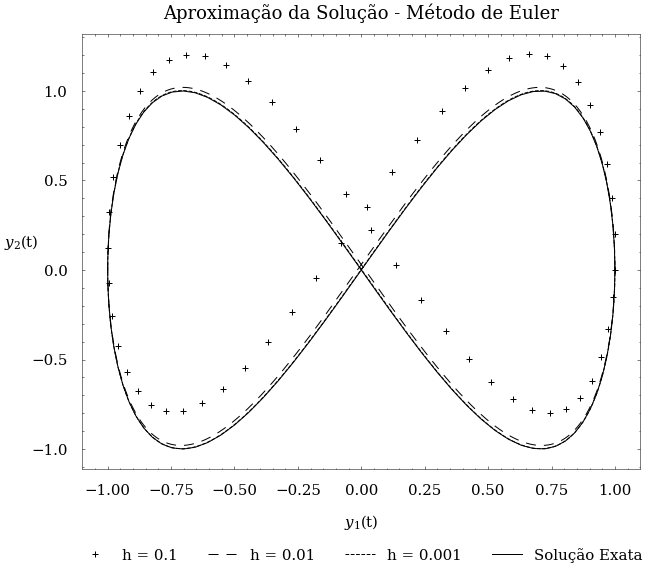

In [49]:
plot_solution(sol_euler,y_exact,"Aproximação da Solução - Método de Euler")
plt.savefig(f'images/euler_1.png', dpi=200)

## Método de Euler Implicito

In [50]:
hs = [0.1, 0.01, 0.001]

sol_euler_imp = []
t = []
for h_ in hs:
    t_,sol = edo_tarefa2.solve(h=h_,method = "euler-implicit")
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_euler_imp.append(sol)

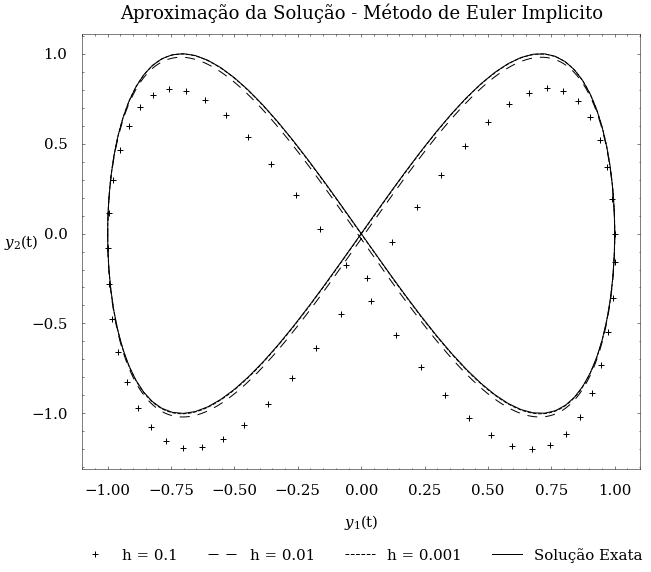

In [51]:
plot_solution(sol_euler_imp,y_exact,"Aproximação da Solução - Método de Euler Implicito")
plt.savefig(f'images/euler_imp_1.png', dpi=200)

## Método de Runge-Kutta

In [52]:
hs = [0.1, 0.01, 0.001]

sol_rk = []
t = []
for h_ in hs:
    t_,sol = edo_tarefa2.solve(h=h_,method = "runge-kutta")
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_rk.append(sol)

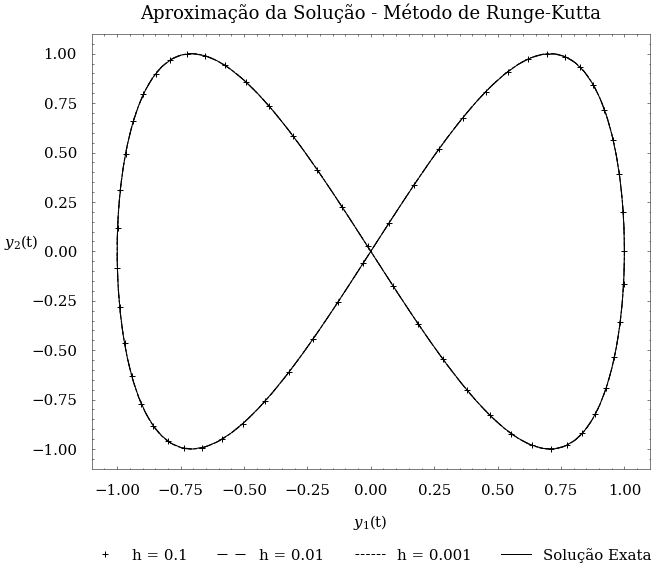

In [53]:
plot_solution(sol_rk,y_exact,"Aproximação da Solução - Método de Runge-Kutta")
plt.savefig(f'images/runge-kutta_1.png', dpi=200)

## Comparação entre Métodos

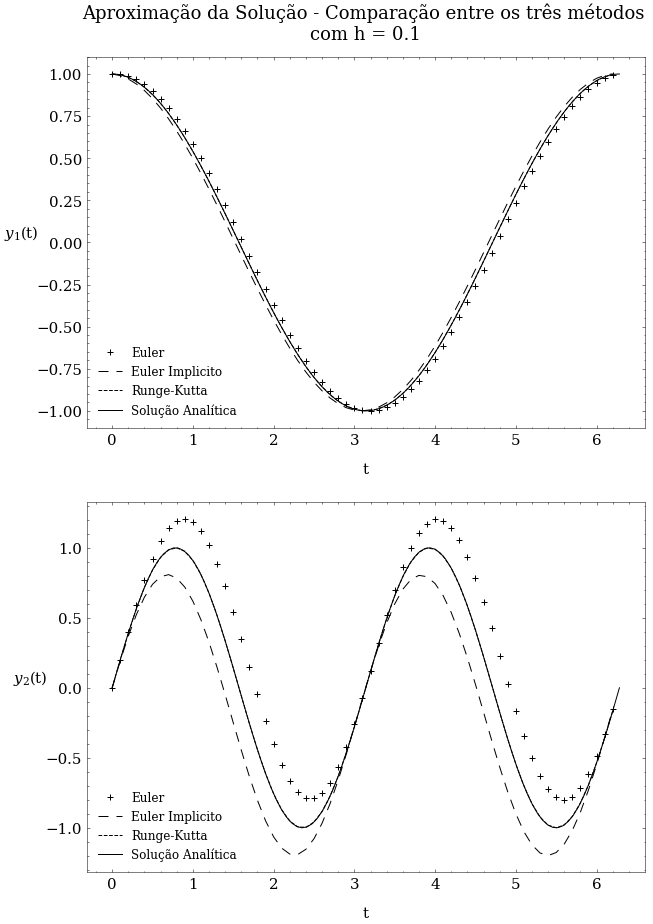

In [54]:
fig,ax = plt.subplots(2,1,figsize=(10,15))

ax[0].plot(t[0],sol_euler[0][0],'k+', label="Euler") #,'k--',dashes=[10,8]
ax[0].plot(t[0],sol_euler_imp[0][0],'k--',dashes=[10,8], label="Euler Implicito") #,'k--',dashes=[10,8]
ax[0].plot(t[0],sol_rk[0][0],'k--', label="Runge-Kutta") #,'k--',dashes=[10,8]
ax[0].plot(t_e,y_exact[0],'k-', label="Solução Analítica")
ax[0].set_title("Aproximação da Solução - Comparação entre os três métodos \ncom h = 0.1",fontsize=18, pad = 18)
ax[0].set_xlabel('t', fontsize=15, labelpad = 15)
ax[0].set_ylabel('$y_1$(t)', fontsize=15, rotation = 0, labelpad = 15)

ax[1].plot(t[0],sol_euler[0][1],'k+', label="Euler") #,'k--',dashes=[10,8]
ax[1].plot(t[0],sol_euler_imp[0][1],'k--',dashes=[10,8], label="Euler Implicito") #,'k--',dashes=[10,8]
ax[1].plot(t[0],sol_rk[0][1],'k--', label="Runge-Kutta") #,'k--',dashes=[10,8]
ax[1].plot(t_e,y_exact[1],'k-', label="Solução Analítica")
ax[1].set_xlabel('t', fontsize=15, labelpad = 15)
ax[1].set_ylabel('$y_2$(t)', fontsize=15, rotation = 0, labelpad = 15)

for i in range(2):
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].legend(fontsize=12, loc = "lower left")
    ax[i].tick_params(axis='both', which='major', labelsize=15, pad=5)
    
plt.savefig(f'images/comparacao_1.png', dpi=200)

# Análise de Convergência

In [56]:
edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=2, y_true = y_true, method= "euler-explicit")

[list([array([1, 0]), array([1., 2.]), array([0.15852902, 4.        ]), array([-0.75076841,  2.10052579]), array([-0.89188842,  2.35513863]), array([-0.13508592,  3.53699844]), array([0.82383835, 1.60999127]), array([1.10325385, 2.32482978]), array([0.44626725, 5.19350599]), array([-0.543091  ,  3.99012383]), array([-0.95520948,  3.16991515])])
 list([array([1, 0]), array([1., 1.]), array([0.76028723, 2.        ]), array([0.33955174, 2.15607335]), array([-0.15919576,  1.38666411]), array([-0.61384447,  0.43735069]), array([-0.91308054,  0.19096075]), array([-0.98364054,  0.8583929 ]), array([-0.80824893,  1.79349034]), array([-0.42984768,  2.10002301]), array([0.05891738, 1.46956107]), array([0.53837951, 0.47650358]), array([0.89114968, 0.05620858]), array([1.03085743, 0.64450407]), array([0.92329743, 1.76983814]), array([0.59480413, 2.47479443]), array([0.12580414, 2.18237834]), array([-0.36887498,  1.2140317 ]), array([-0.76811854,  0.4861692 ]), array([-0.97417778,  0.66618138]), ar

AxisError: axis2: axis 1 is out of bounds for array of dimension 1

In [13]:
conv_res_euler = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-explicit")


In [14]:
for index, row in conv_res_euler.iterrows():
    k, h_k, y_var0, y_var1, e_tilde_var0, e_tilde_var1,p_tilde_var0, p_tilde_var1, error_var0, error_var1, p_var0,p_var1 = row
    r_table = f"${2**k:.0f}$ & ${error_var0:.5f}$ & ${error_var1:.5f}$ & ${e_tilde_var0:.5f}$ & ${e_tilde_var1:.5f}$\\\\\n"
    print(r_table.replace("nan","-"))


$1$ & $0.11614$ & $2.25697$ & $-$ & $-$\\

$2$ & $0.09753$ & $0.65128$ & $-$ & $-$\\

$4$ & $0.05841$ & $0.29169$ & $-0.01688$ & $2.06905$\\

$8$ & $0.03161$ & $0.14499$ & $0.12431$ & $0.60738$\\

$16$ & $0.01640$ & $0.07303$ & $0.06193$ & $0.28793$\\

$32$ & $0.00835$ & $0.03673$ & $0.03232$ & $0.14522$\\

$64$ & $0.00421$ & $0.01843$ & $0.01656$ & $0.07322$\\

$128$ & $0.00212$ & $0.00923$ & $0.00839$ & $0.03679$\\

$256$ & $0.00106$ & $0.00462$ & $0.00422$ & $0.01845$\\

$512$ & $0.00053$ & $0.00231$ & $0.00212$ & $0.00924$\\



In [15]:
for index, row in conv_res_euler.iterrows():
    k, h_k, y_var0, y_var1, e_tilde_var0, e_tilde_var1,p_tilde_var0, p_tilde_var1, error_var0, error_var1, p_var0,p_var1 = row
    r_table = f"${2**k:.0f}$ & ${p_var0:.5f}$ & ${p_var1:.5f}$ & ${p_tilde_var0:.5f}$ & ${p_tilde_var1:.5f}$\\\\\n"
    print(r_table.replace("nan","-"))


$1$ & $-$ & $-$ & $-$ & $-$\\

$2$ & $0.25191$ & $1.79304$ & $-$ & $-$\\

$4$ & $0.73954$ & $1.15885$ & $-1.07191$ & $2.15876$\\

$8$ & $0.88612$ & $1.00849$ & $0.54511$ & $1.29348$\\

$16$ & $0.94633$ & $0.98934$ & $0.81821$ & $1.02767$\\

$32$ & $0.97391$ & $0.99153$ & $0.91717$ & $0.98713$\\

$64$ & $0.98713$ & $0.99506$ & $0.96032$ & $0.98796$\\

$128$ & $0.99361$ & $0.99736$ & $0.98056$ & $0.99274$\\

$256$ & $0.99681$ & $0.99864$ & $0.99038$ & $0.99608$\\

$512$ & $0.99841$ & $0.99931$ & $0.99521$ & $0.99797$\\



In [16]:
edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-implicit")

,k,h_k,y_var0,y_var1,e_tilde_var0,e_tilde_var1,p_tilde_var0,p_tilde_var1,error_var0,error_var1,p_var0,p_var1
0,0,1.000000,-0.411188,-0.504081,NaN,NaN,NaN,NaN,0.427883,1.417026,NaN,NaN
1,1,0.500000,-0.664592,0.202038,NaN,NaN,NaN,NaN,0.174480,0.710908,1.294156,0.995132
2,2,0.250000,-0.761480,0.589968,0.410270,1.567007,1.387034,0.864113,0.077591,0.322977,1.169097,1.138228
3,3,0.125000,-0.802675,0.759117,0.168553,0.687858,1.233875,1.197496,0.036397,0.153828,1.092089,1.070118
4,4,0.062500,-0.821472,0.837640,0.075768,0.315707,1.131935,1.107121,0.017599,0.075305,1.048280,1.030496
5,5,0.031250,-0.830422,0.875642,0.035879,0.152164,1.070663,1.047041,0.008650,0.037303,1.024751,1.013443
6,6,0.015625,-0.834784,0.894373,0.017461,0.074941,1.036657,1.020603,0.004288,0.018572,1.012536,1.006185
7,7,0.007812,-0.836937,0.903678,0.008614,0.037221,1.018682,1.009402,0.002134,0.009267,1.006309,1.002948
8,8,0.003906,-0.838007,0.908316,0.004278,0.018553,1.009432,1.004455,0.001065,0.004629,1.003165,1.001436
9,9,0.001953,-0.838540,0.910632,0.002132,0.009262,1.004739,1.002163,0.000532,0.002313,1.001585,1.000709


In [17]:
conv_res_euler_imp= edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-implicit")

In [18]:
for index, row in conv_res_euler_imp.iterrows():
    k, h_k, y_var0, y_var1, e_tilde_var0, e_tilde_var1,p_tilde_var0, p_tilde_var1, error_var0, error_var1, p_var0,p_var1 = row
    r_table = f"${2**k:.0f}$ & ${error_var0:.5f}$ & ${error_var1:.5f}$ & ${e_tilde_var0:.5f}$ & ${e_tilde_var1:.5f}$\\\\\n"
    print(r_table.replace("nan","-"))

$1$ & $0.42788$ & $1.41703$ & $-$ & $-$\\

$2$ & $0.17448$ & $0.71091$ & $-$ & $-$\\

$4$ & $0.07759$ & $0.32298$ & $0.41027$ & $1.56701$\\

$8$ & $0.03640$ & $0.15383$ & $0.16855$ & $0.68786$\\

$16$ & $0.01760$ & $0.07531$ & $0.07577$ & $0.31571$\\

$32$ & $0.00865$ & $0.03730$ & $0.03588$ & $0.15216$\\

$64$ & $0.00429$ & $0.01857$ & $0.01746$ & $0.07494$\\

$128$ & $0.00213$ & $0.00927$ & $0.00861$ & $0.03722$\\

$256$ & $0.00106$ & $0.00463$ & $0.00428$ & $0.01855$\\

$512$ & $0.00053$ & $0.00231$ & $0.00213$ & $0.00926$\\



In [19]:
for index, row in conv_res_euler_imp.iterrows():
    k, h_k, y_var0, y_var1, e_tilde_var0, e_tilde_var1,p_tilde_var0, p_tilde_var1, error_var0, error_var1, p_var0,p_var1 = row
    r_table = f"${2**k:.0f}$ & ${p_var0:.5f}$ & ${p_var1:.5f}$ & ${p_tilde_var0:.5f}$ & ${p_tilde_var1:.5f}$\\\\\n"
    print(r_table.replace("nan","-"))

$1$ & $-$ & $-$ & $-$ & $-$\\

$2$ & $1.29416$ & $0.99513$ & $-$ & $-$\\

$4$ & $1.16910$ & $1.13823$ & $1.38703$ & $0.86411$\\

$8$ & $1.09209$ & $1.07012$ & $1.23388$ & $1.19750$\\

$16$ & $1.04828$ & $1.03050$ & $1.13194$ & $1.10712$\\

$32$ & $1.02475$ & $1.01344$ & $1.07066$ & $1.04704$\\

$64$ & $1.01254$ & $1.00619$ & $1.03666$ & $1.02060$\\

$128$ & $1.00631$ & $1.00295$ & $1.01868$ & $1.00940$\\

$256$ & $1.00316$ & $1.00144$ & $1.00943$ & $1.00445$\\

$512$ & $1.00158$ & $1.00071$ & $1.00474$ & $1.00216$\\



In [20]:
edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "runge-kutta")

,k,h_k,y_var0,y_var1,e_tilde_var0,e_tilde_var1,p_tilde_var0,p_tilde_var1,error_var0,error_var1,p_var0,p_var1
0,0,1.000000,-0.839730,1.210346,NaN,NaN,NaN,NaN,6.580834e-04,2.974011e-01,NaN,NaN
1,1,0.500000,-0.839112,0.931663,NaN,NaN,NaN,NaN,4.020932e-05,1.871782e-02,4.032669,3.989926
2,2,0.250000,-0.839074,0.914115,6.580355e-04,2.974102e-01,4.034283,3.989270,2.499048e-06,1.170083e-03,4.008079,3.999729
3,3,0.125000,-0.839072,0.913018,4.020858e-05,1.871790e-02,4.008482,3.999635,1.559726e-07,7.307232e-05,4.002014,4.001142
4,4,0.062500,-0.839072,0.912950,2.499036e-06,1.170082e-03,4.002115,4.001158,9.744884e-09,4.564166e-06,4.000503,4.000902
5,5,0.031250,-0.839072,0.912946,1.559724e-07,7.307224e-05,4.000528,4.000926,6.090020e-10,2.851546e-07,4.000126,4.000535
6,6,0.015625,-0.839072,0.912945,9.744880e-09,4.564163e-06,4.000134,4.000551,3.806255e-11,1.781860e-08,4.000003,4.000289
7,7,0.007812,-0.839072,0.912945,6.090043e-10,2.851545e-07,3.999921,4.000297,2.376876e-12,1.113535e-09,4.001234,4.000165
8,8,0.003906,-0.839072,0.912945,3.806077e-11,1.781858e-08,4.002246,4.000182,1.499911e-13,6.960066e-11,3.986118,3.999902
9,9,0.001953,-0.839072,0.912945,2.382233e-12,1.113579e-09,3.938743,3.999053,4.773959e-15,4.311884e-12,4.973547,4.012711


In [21]:
conv_res_rk = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "runge-kutta")

In [22]:
for index, row in conv_res_rk.iterrows():
    k, h_k, y_var0, y_var1, e_tilde_var0, e_tilde_var1,p_tilde_var0, p_tilde_var1, error_var0, error_var1, p_var0,p_var1 = row
    r_table = f"${2**k:.0f}$ & ${error_var0:.4e}$ & ${error_var1:.4e}$ & ${e_tilde_var0:.4e}$ & ${e_tilde_var1:.4e}$\\\\\n"
    print(r_table.replace("nan","-"))

$1$ & $6.5808e-04$ & $2.9740e-01$ & $-$ & $-$\\

$2$ & $4.0209e-05$ & $1.8718e-02$ & $-$ & $-$\\

$4$ & $2.4990e-06$ & $1.1701e-03$ & $6.5804e-04$ & $2.9741e-01$\\

$8$ & $1.5597e-07$ & $7.3072e-05$ & $4.0209e-05$ & $1.8718e-02$\\

$16$ & $9.7449e-09$ & $4.5642e-06$ & $2.4990e-06$ & $1.1701e-03$\\

$32$ & $6.0900e-10$ & $2.8515e-07$ & $1.5597e-07$ & $7.3072e-05$\\

$64$ & $3.8063e-11$ & $1.7819e-08$ & $9.7449e-09$ & $4.5642e-06$\\

$128$ & $2.3769e-12$ & $1.1135e-09$ & $6.0900e-10$ & $2.8515e-07$\\

$256$ & $1.4999e-13$ & $6.9601e-11$ & $3.8061e-11$ & $1.7819e-08$\\

$512$ & $4.7740e-15$ & $4.3119e-12$ & $2.3822e-12$ & $1.1136e-09$\\



In [23]:
for index, row in conv_res_rk.iterrows():
    k, h_k, y_var0, y_var1, e_tilde_var0, e_tilde_var1,p_tilde_var0, p_tilde_var1, error_var0, error_var1, p_var0,p_var1 = row
    r_table = f"${2**k:.0f}$ & ${p_var0:.5f}$ & ${p_var1:.5f}$ & ${p_tilde_var0:.5f}$ & ${p_tilde_var1:.5f}$\\\\\n"
    print(r_table.replace("nan","-"))

$1$ & $-$ & $-$ & $-$ & $-$\\

$2$ & $4.03267$ & $3.98993$ & $-$ & $-$\\

$4$ & $4.00808$ & $3.99973$ & $4.03428$ & $3.98927$\\

$8$ & $4.00201$ & $4.00114$ & $4.00848$ & $3.99963$\\

$16$ & $4.00050$ & $4.00090$ & $4.00212$ & $4.00116$\\

$32$ & $4.00013$ & $4.00053$ & $4.00053$ & $4.00093$\\

$64$ & $4.00000$ & $4.00029$ & $4.00013$ & $4.00055$\\

$128$ & $4.00123$ & $4.00016$ & $3.99992$ & $4.00030$\\

$256$ & $3.98612$ & $3.99990$ & $4.00225$ & $4.00018$\\

$512$ & $4.97355$ & $4.01271$ & $3.93874$ & $3.99905$\\



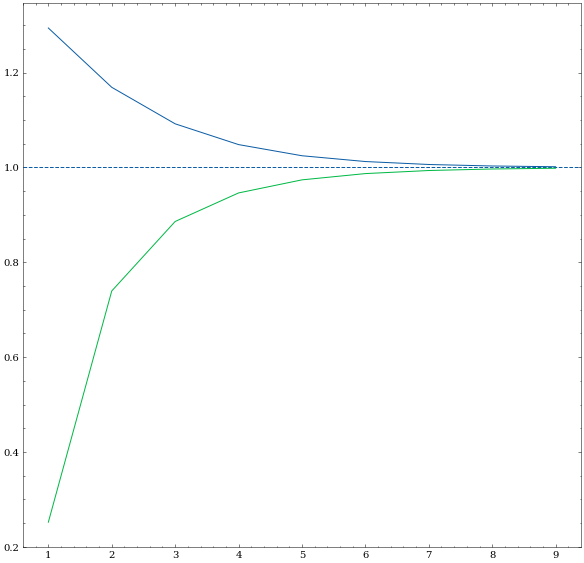

In [25]:
ttt = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "runge-kutta")
yyy = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-implicit")
zzz = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-explicit")
fig,ax = plt.subplots(figsize=(10,10))
#ax.plot(ttt.p_var1)
ax.axhline(y=1, xmin=0, xmax=1,ls="--")
ax.plot(yyy.p_var0)
ax.plot(zzz.p_var0)

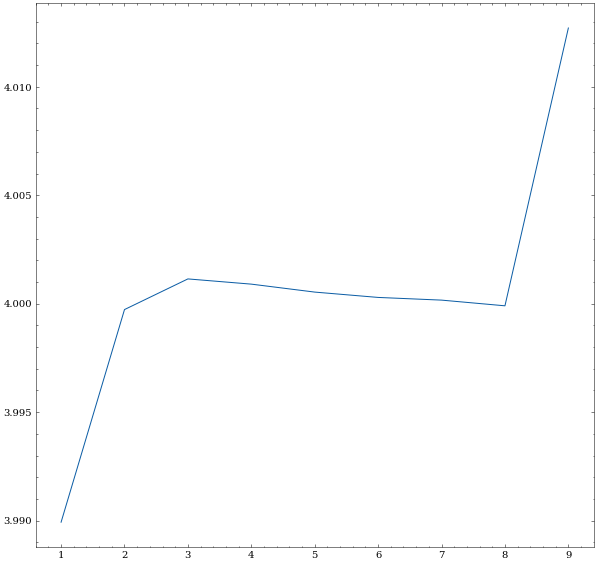

In [26]:
ttt = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "runge-kutta")
yyy = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-implicit")
zzz = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-explicit")
fig,ax = plt.subplots(figsize=(10,10))
#ax.plot(ttt.p_var1)

#ax.plot(ttt.p_var0)
ax.plot(ttt.p_var1)